### Importing Libararies :

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

### Data Reading and Cleaning : 

In [2]:
flight_05 = pd.read_csv('/Users/rak/Desktop/2005.csv')
flight_06 = pd.read_csv('/Users/rak/Desktop/2006.csv')
flight_07 = pd.read_csv('/Users/rak/Desktop/2007.csv')
flight_08 = pd.read_csv('/Users/rak/Desktop/2008.csv')
airports = pd.read_csv('/Users/rak/Desktop/airports.csv')
carriers = pd.read_csv('/Users/rak/Desktop/carriers.csv')
plane_data = pd.read_csv('/Users/rak/Desktop/plane-data.csv')

In [3]:
print(flight_05.shape)
print(flight_06.shape)
print(flight_07.shape)
print(flight_08.shape)

(7140596, 29)
(7141922, 29)
(7453215, 29)
(2389217, 29)


In [4]:
#Dropping rows with cancelled or diverted flights:

flight_05=flight_05[flight_05['Cancelled']==0] 
flight_05=flight_05[flight_05['Diverted']==0] 

flight_06=flight_06[flight_06['Cancelled']==0] 
flight_06=flight_06[flight_06['Diverted']==0] 

flight_07=flight_07[flight_07['Cancelled']==0] 
flight_07=flight_07[flight_07['Diverted']==0] 

In [5]:
#Merging the Dataframes:

flight_data = pd.concat([flight_05, flight_06, flight_07],ignore_index=True)

In [6]:
flight_data['DepTime'] = pd.to_datetime(flight_data['DepTime'], format='%H%M', errors='coerce')
flight_data['ArrTime'] = pd.to_datetime(flight_data['ArrTime'], format='%H%M', errors='coerce')

### Question 3:

In [7]:
# Most popular Destinations: 

top_destinations = flight_data["Dest"].value_counts().nlargest(4).index.tolist()
print(top_destinations)

['ATL', 'ORD', 'DFW', 'LAX']


In [10]:
ATL_ORD = flight_data[(flight_data['Dest']=='ATL') & (flight_data['Origin']=='ORD')]
ATL_ORD= flight_data[(flight_data['Dest']=='ORD') & (flight_data['Origin']=='ATL')]

In [11]:
ATL_ORD.shape

(22653, 29)

In [12]:
ATL_ORD

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
333,2005,1,1,6,1900-01-01 09:51:00,945,1900-01-01 11:04:00,1055,UA,553,...,6,31,0,NaN,0,0,0,0,0,0
334,2005,1,2,7,1900-01-01 09:48:00,945,1900-01-01 11:01:00,1055,UA,553,...,4,29,0,NaN,0,0,0,0,0,0
335,2005,1,3,1,1900-01-01 09:43:00,945,1900-01-01 11:06:00,1055,UA,553,...,10,32,0,NaN,0,0,0,0,0,0
336,2005,1,4,2,1900-01-01 09:42:00,945,1900-01-01 10:41:00,1055,UA,553,...,5,22,0,NaN,0,0,0,0,0,0
337,2005,1,5,3,1900-01-01 09:44:00,945,1900-01-01 11:06:00,1055,UA,553,...,4,31,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21271210,2007,12,14,5,1900-01-01 11:49:00,1150,1900-01-01 12:44:00,1257,DL,1119,...,9,16,0,NaN,0,0,0,0,0,0
21271441,2007,12,14,5,1900-01-01 22:28:00,2145,1900-01-01 23:18:00,2251,DL,1474,...,7,15,0,NaN,0,0,0,0,0,27
21271582,2007,12,14,5,1900-01-01 06:59:00,700,1900-01-01 07:52:00,800,DL,1626,...,7,15,0,NaN,0,0,0,0,0,0
21271698,2007,12,14,5,1900-01-01 13:21:00,1327,1900-01-01 14:28:00,1430,DL,1751,...,6,20,0,NaN,0,0,0,0,0,0


In [16]:
pairs = {
    1: ["ATL","ORD"],
    2: ['ATL' ,'DFW'],
    3: ['ATL','LAX'],
    4: ['ORD','DFW'],
    5: ['LAX','ORD'],
    6: ['LAX','DFW']
}

pair_dict = {}

for i in range(1,7):
    origin = pairs[i][0]
    destination = pairs[i][1]
    PAIR = flight_data[(flight_data['Dest']==origin) & (flight_data['Origin']==destination)]
    PAIR = flight_data[(flight_data['Dest']==destination) & (flight_data['Origin']==origin)]
    pair_dict[i] = PAIR

In [19]:
pair_dict['ATL-ORD'] = pair_dict.pop(1)
pair_dict['ATL-DFW'] = pair_dict.pop(2)
pair_dict['ATL-LAX'] = pair_dict.pop(3)
pair_dict['ORD-DFW'] = pair_dict.pop(4)
pair_dict['LAX-ORD'] = pair_dict.pop(5)
pair_dict['LAX-DFW'] = pair_dict.pop(6)

In [27]:
for key in pair_dict:
    pair_dict[key] = pair_dict[key][['Year', 'Origin', 'Dest', 'Month']]

In [28]:
pair_dict

{'ATL-ORD':           Year Origin Dest  Month
 333       2005    ATL  ORD      1
 334       2005    ATL  ORD      1
 335       2005    ATL  ORD      1
 336       2005    ATL  ORD      1
 337       2005    ATL  ORD      1
 ...        ...    ...  ...    ...
 21271210  2007    ATL  ORD     12
 21271441  2007    ATL  ORD     12
 21271582  2007    ATL  ORD     12
 21271698  2007    ATL  ORD     12
 21271755  2007    ATL  ORD     12
 
 [22653 rows x 4 columns],
 'ATL-DFW':           Year Origin Dest  Month
 285373    2005    ATL  DFW      1
 285375    2005    ATL  DFW      1
 285686    2005    ATL  DFW      1
 285873    2005    ATL  DFW      1
 285936    2005    ATL  DFW      1
 ...        ...    ...  ...    ...
 21271101  2007    ATL  DFW     12
 21271157  2007    ATL  DFW     12
 21271280  2007    ATL  DFW     12
 21271288  2007    ATL  DFW     12
 21271377  2007    ATL  DFW     12
 
 [29744 rows x 4 columns],
 'ATL-LAX':           Year Origin Dest  Month
 285400    2005    ATL  LAX      1

In [38]:
month_group={
    'ATL-ORD': None,
    'ATL-DFW': None,
    'ATL-LAX': None,
    'ORD-DFW': None,
    'LAX-ORD': None,
    'LAX-DFW': None
}
for key in pair_dict:
    month_group[key] = pair_dict[key].groupby("Month").size()
    

print(month_group)

{'ATL-ORD': Month
1     1891
2     1788
3     2056
4     1885
5     1979
6     1904
7     1943
8     1987
9     1808
10    1877
11    1802
12    1733
dtype: int64, 'ATL-DFW': Month
1     2434
2     2202
3     2494
4     2472
5     2560
6     2548
7     2621
8     2633
9     2420
10    2545
11    2462
12    2353
dtype: int64, 'ATL-LAX': Month
1     1126
2     1015
3     1158
4     1132
5     1280
6     1322
7     1410
8     1416
9     1271
10    1336
11    1288
12    1281
dtype: int64, 'ORD-DFW': Month
1     2038
2     1806
3     2027
4     1967
5     2064
6     2039
7     2118
8     2110
9     2076
10    2173
11    2053
12    2015
dtype: int64, 'LAX-ORD': Month
1     1977
2     1777
3     2008
4     1961
5     2045
6     1948
7     1996
8     1989
9     1900
10    1988
11    1869
12    1892
dtype: int64, 'LAX-DFW': Month
1     1675
2     1406
3     1589
4     1633
5     1717
6     1695
7     1796
8     1768
9     1673
10    1748
11    1679
12    1650
dtype: int64}


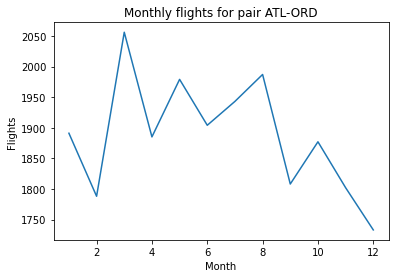

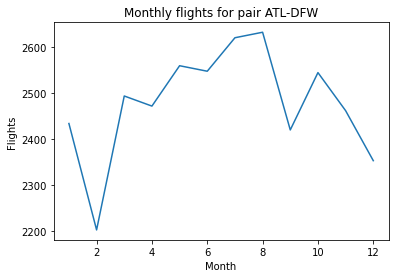

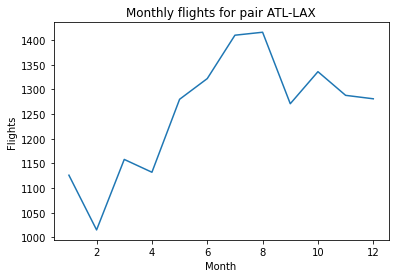

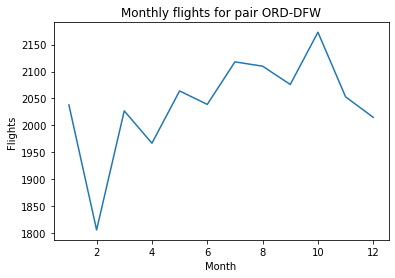

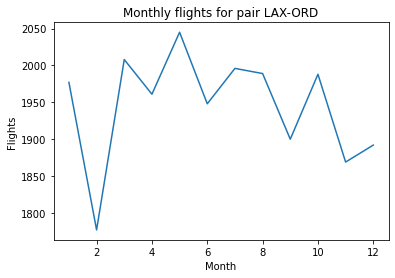

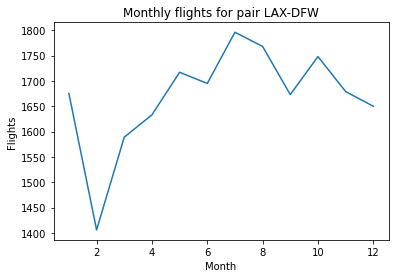

In [36]:
# loop through the keys in the month_group dictionary
for pair_key in month_group:
    # get the monthly flights for the current pair
    monthly_flights = month_group[pair_key]
    
    # create a new figure and axis
    fig, ax = plt.subplots()
    
    # plot the monthly flights as a line chart
    ax.plot(monthly_flights)
    
    # set the title and labels
    ax.set_title(f"Monthly flights for pair {pair_key}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Flights")
    
    # display the plot
    plt.show()

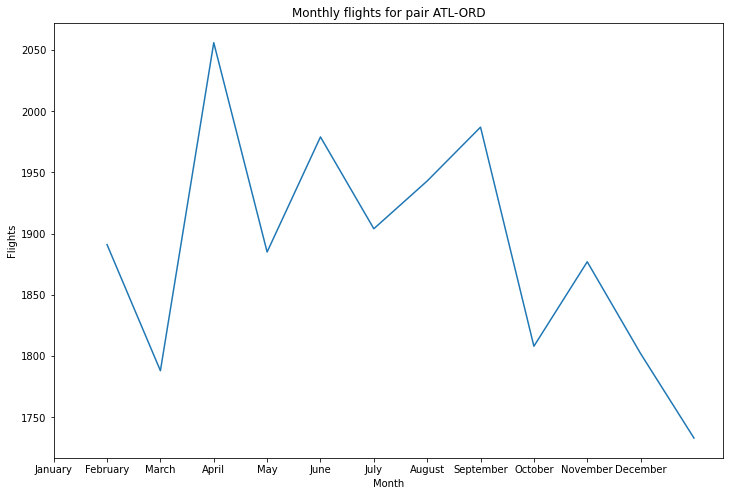

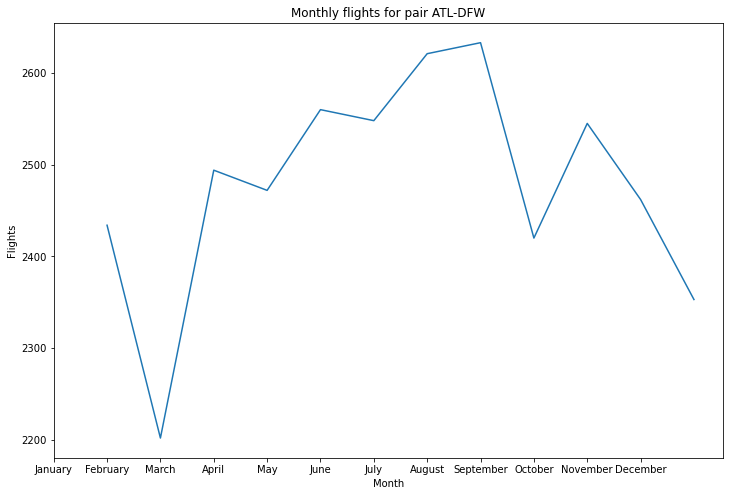

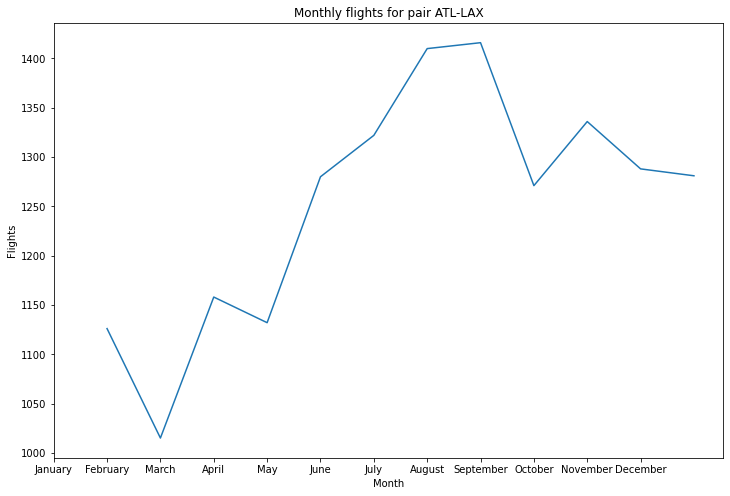

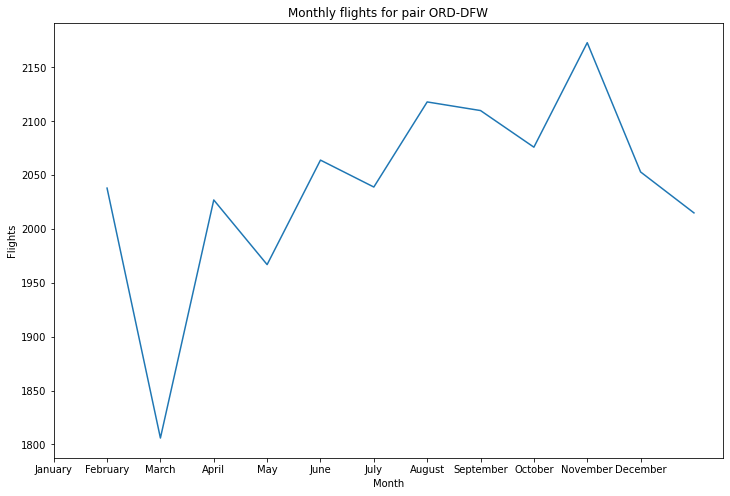

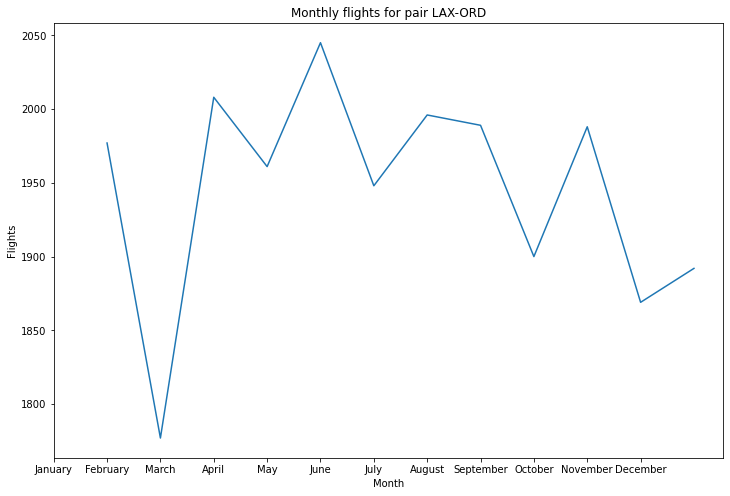

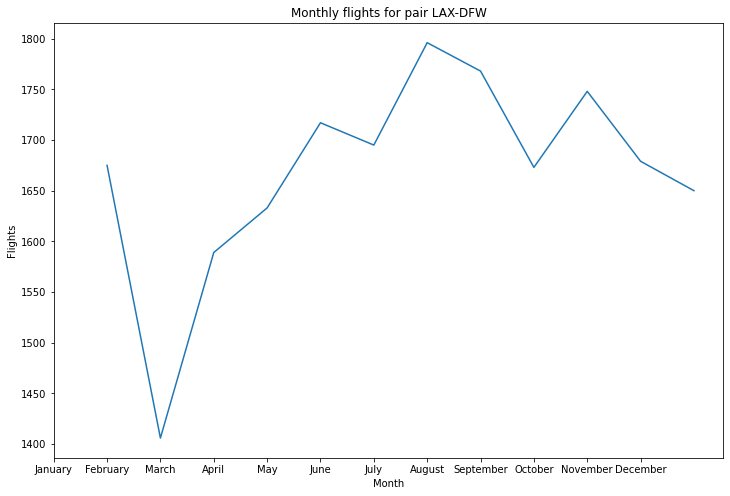

In [41]:
# loop through the keys in the month_group dictionary
for pair_key in month_group:
    # get the monthly flights for the current pair
    monthly_flights = month_group[pair_key]
    
    # create a new figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # plot the monthly flights as a line chart
    ax.plot(monthly_flights)
    
    # set the title and labels
    ax.set_title(f"Monthly flights for pair {pair_key}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Flights")
    
    # set the x-axis tick labels to be the names of the months
    ax.set_xticks(range(12))
    ax.set_xticklabels([calendar.month_name[i+1] for i in range(12)])
    
    # display the plot
    plt.show()